In [85]:
res_counter = 0
with open("D:\downloads/dcdfile/ligand_11.pdb") as file:
    lines = file.readlines()
    for line in lines:
        if "HETATM" in line and "MOL" in line:
            print(line)
            res_counter += 1

HETATM 4157  N   MOL I   1      18.156 -12.898  21.795  1.00  0.00           N  

HETATM 4158  C   MOL I   1      17.855 -11.611  21.148  1.00  0.00           C  

HETATM 4159  C1  MOL I   1      17.314 -13.419  22.713  1.00  0.00           C  

HETATM 4160  O   MOL I   1      16.254 -12.903  23.041  1.00  0.00           O  

HETATM 4161  C2  MOL I   1      16.500 -11.602  20.474  1.00  0.00           C  

HETATM 4162  O1  MOL I   1      16.133 -12.509  19.741  1.00  0.00           O  

HETATM 4163  C3  MOL I   1      18.957 -11.504  20.085  1.00  0.00           C  

HETATM 4164  C4  MOL I   1      17.736 -14.740  23.326  1.00  0.00           C  

HETATM 4165  N1  MOL I   1      15.771 -10.517  20.786  1.00  0.00           N  

HETATM 4166  C5  MOL I   1      20.109 -12.342  20.644  1.00  0.00           C  

HETATM 4167  N2  MOL I   1      16.496 -15.578  23.446  1.00  0.00           N1+

HETATM 4168  C6  MOL I   1      18.305 -14.517  24.742  1.00  0.00           C  

HETATM 4169  C7 

In [42]:
print(f"The system contains {res_counter} ligand atoms.")

The system contains 52 ligand atoms.


In [45]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis
import MDAnalysis.analysis.rms
import MDAnalysis.analysis.distances
import matplotlib.pyplot as plt

In [2]:
data_path = "D:\downloads\dcdfile"

In [3]:
protein_frames = []
with mda.lib.formats.libdcd.DCDFile(data_path+"\ligand_11.dcd") as trajectory_file:
    for frame in trajectory_file:
        protein_frames.append(frame)

In [4]:
protein_first_frame = protein_frames[0].xyz
universe = mda.Universe(data_path+"\ligand_11.prmtop", data_path+"\ligand_11.dcd")
reference_universe = mda.Universe(data_path+"\ligand_11.prmtop", protein_first_frame)

In [5]:
protein_structure = universe.select_atoms("protein")
reference_protein_structure = reference_universe.select_atoms("protein")

In [8]:
# This cell computes the RMSD of the backbone of the protein
rmsd_protein = mda.analysis.rms.RMSD(protein_structure, reference_protein_structure, select="backbone")
rmsd_protein.run()

In [9]:
protein_rmsd_result = rmsd_protein.results.rmsd.T
print(protein_rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [8.21505588e-07 5.82836172e-01 6.71294693e-01 ... 2.59523602e+00
  2.57869756e+00 2.54749812e+00]]


In [ ]:
print("This is a new cell")

In [10]:
protein_time = protein_rmsd_result[1]
protein_rmsd_values = protein_rmsd_result[2]

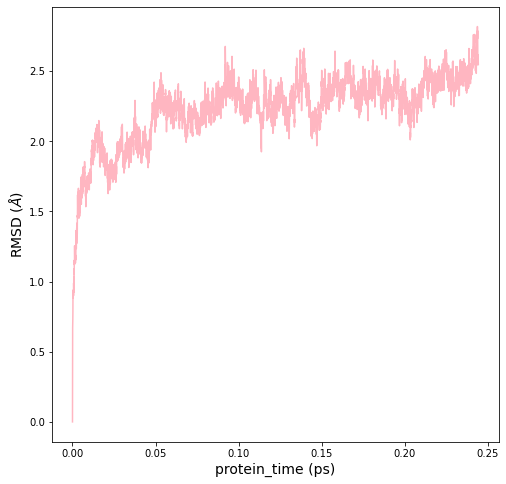

In [50]:
fig = plt.figure(figsize=(8, 8))
plt.plot(protein_time, protein_rmsd_values, "-", color='lightpink')
plt.xlabel("protein_time (ps)", fontsize = 14)
plt.ylabel(r"RMSD ($\AA$)", fontsize = 14)
plt.savefig("plots/ligand11_rmsd_protein.png")

In [20]:
plt.savefig("plots/ligand11_rmsd_protein.png")

<Figure size 432x288 with 0 Axes>

In [22]:
ligand_frames = []
with mda.lib.formats.libdcd.DCDFile(data_path+"/ligand_11.dcd") as trajectory_file:
    for frame in trajectory_file:
        ligand_frames.append(frame)

In [24]:
ligand_first_frame = ligand_frames[0].xyz
universe = mda.Universe(data_path+"/ligand_11.prmtop", data_path+"/ligand_11.dcd")
reference_universe = mda.Universe(data_path+"/ligand_11.prmtop", ligand_first_frame)

In [25]:
ligand_structure = universe.select_atoms("resname MOL")
reference_ligand_structure = reference_universe.select_atoms("resname MOL")

In [26]:
ligand_structure

<AtomGroup with 52 atoms>

In [27]:
reference_ligand_structure

<AtomGroup with 52 atoms>

In [28]:
print(f"The system contains {res_counter} ligand atoms.")

NameError: name 'res_counter' is not defined

In [29]:
rmsd_ligand = mda.analysis.rms.RMSD(ligand_structure, reference_ligand_structure)
rmsd_ligand.run()

In [30]:
ligand_rmsd_result = rmsd_ligand.results.rmsd.T
print(ligand_rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [9.35154606e-08 6.08122646e-01 5.32160464e-01 ... 2.74413300e+00
  2.47750029e+00 2.42604267e+00]]


In [31]:
ligand_time = ligand_rmsd_result[1]
ligand_rmsd_values = ligand_rmsd_result[2]

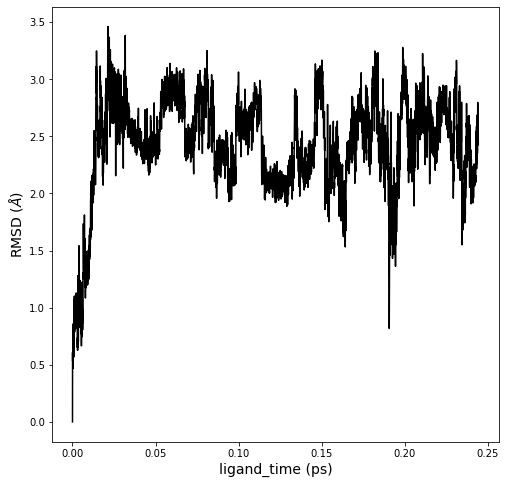

In [33]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(ligand_time, ligand_rmsd_values, "k-")
ax.set_xlabel("ligand_time (ps)", fontsize = 14)
ax.set_ylabel(r"RMSD ($\AA$)", fontsize = 14)
plt.savefig("plots/rmsd_ligand.pdf")

<Figure size 432x288 with 0 Axes>

In [34]:
mean_rmsd_ligand = np.mean(ligand_rmsd_values)
standard_deviation_rmsd_ligand = np.std(ligand_rmsd_values)

In [35]:
print(f"Average RMSD of ligand: ({mean_rmsd_ligand:.3f} \u00B1 {standard_deviation_rmsd_ligand:.3f}) \u212B")

Average RMSD of ligand: (2.434 ± 0.431) Å


Distance between protein centre of mass and ligand centre of mass

In [36]:
protein_centre_of_mass = protein_structure.center_of_mass()
ligand_centre_of_mass = ligand_structure.center_of_mass()

In [39]:
protein_centre_of_mass

array([35.92700918, 50.83779817, 29.58144545])

In [41]:
x_1 = protein_centre_of_mass[0]
y_1 = protein_centre_of_mass[1]
z_1 = protein_centre_of_mass[2]

In [42]:
x_2 = ligand_centre_of_mass[0]
y_2 = ligand_centre_of_mass[1]
z_2 = ligand_centre_of_mass[2]

In [43]:
print(f"Protein CoM: x: {x_1:.2f}, y: {y_1:.2f}, z: {z_1:.2f}")
print(f"Ligand CoM: x: {x_2:.2f}, y: {y_2:.2f}, z: {z_2:.2f}")

Protein CoM: x: 35.93, y: 50.84, z: 29.58
Ligand CoM: x: 39.56, y: 37.18, z: 30.62


In [46]:
distance_array = mda.analysis.distances.distance_array(ligand_centre_of_mass, protein_centre_of_mass)
distance = distance_array[0][0]
distance

14.16856611234943

In [47]:
print(f"Distance between protein CoM and ligand CoM: {distance:.3f} \u212B")

Distance between protein CoM and ligand CoM: 14.169 Å
